#以下分别用三个案例来演示假设检验的常见类型

##单样本检验——汽车引擎排放水平

“超级引擎”是一家专门生产汽车引擎的公司，根据政府发布的新排放要求，引擎排放平均值要低于20ppm，
（ppm是英文百万分之一的缩写，这里我们只要理解为是按照环保要求汽车尾气中碳氢化合物要低于20ppm）。
公司制造出10台引擎供测试使用，每一台的排放水平如下：15.6 16.2 22.5 20.5 16.4 19.4 16.6 17.9 12.7 13.9
怎么知道，公司生产的引擎是否符合政府规定呢？

样本标准差= 17.169999999999998 单位：ppm
样本标准差= 2.9814426038413018 单位：ppm


/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/pyth

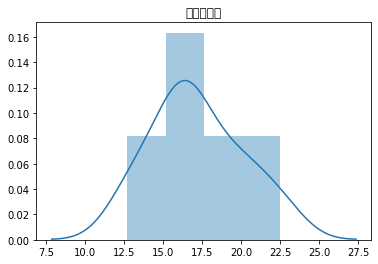

In [21]:
#描述统计分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataSer=pd.Series([15.6,16.2,22.5,20.5,16.4,
                   19.4,16.6,17.9,12.7,13.9])
#样本平均值和样本标准差
sample_mean=dataSer.mean()
sample_std=dataSer.std()
print('样本标准差=',sample_mean,'单位：ppm')
print('样本标准差=',sample_std,'单位：ppm')

import seaborn as sns
sns.distplot(dataSer)
plt.title('数据集分布')
plt.show()

推论统计分析(假设检验，置信区间，效应量)

要研究的问题是：这些样本数据是否满足新标准呢？

根据这个问题我提出来下面两个互为相反的假设。

零假设H0：公司引擎排放不满足标准，也就是平均值u>=20。这里的20是政府规定新标准的最低可能值。

零假设总是表述为研究没有改变，没有效果，不起作用等，这里就是不满足标准。

备选假设H1：公司引擎排放满足标准，也就是平均值u<20

一个样本，选择单样本检验

我们还要判断抽样分布是哪种？因为抽样分布的类型，决定了后面计算p值的不同。

在我们这个汽车引擎案例中，样本大小是10（小于30），属于小样本。
那小样本的抽样分布是否满足t分布呢？因为t分布还要求数据集近似正态分布，所以下面图片我们看下样本数据集的分布长什么样。

直方图能够粗略估计数据密度，如果想给数据一个更精确的拟合曲线
（专业术语叫：核密度估计kernel density estimate (KDE)），
Seaborn 可以很方便的画出直方图和拟合曲线。

要知道随时去官网参考教程

数据集满足t分布的条件，所以抽样分布是t分布，自由度为9

单尾检验（左尾，右尾），还是双尾检验？

因为备选假设是公司引擎排放满足标准，也就是平均值u<20

所以我们使用单尾检验中的左尾检验

在零假设成立前提下，得到样本平均值的概率p是多少？

计算p值步骤也很简单：

1）计算出标准误差

标准误差=样本标准差除以样本大小n的开方。这里的样本标准差是用来估计总体标准差的

2）计算t值

t=（样本平均值-总体平均值）/标准误差

3）根据t值，自由度的计算出概率p值


In [6]:
n=10
se=sample_std/(np.sqrt(n))
pop_mean=20
t=(sample_mean-pop_mean)/se
print('标准误差se=',se)
print('t=',t)

标准误差se= 0.9428149341201592
t= -3.001649525885985


使用scipy包进行计算
用scipy计算出的是：双尾检验

单（1samp）样本t检验（ttest_1samp）：
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

相关（related）样本t检验（ttest_rel）：
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

双独立（independent）样本t检验（ttest_ind）：
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [8]:
from scipy import stats
pop_mean=20
#非线性变化，类似计算过程0.01+0.005*0.25/(3.25-2.821);注意1而不是字母l
t,p_two=stats.ttest_1samp(dataSer,pop_mean)
print('t值',t,'双尾检验的p值=',p_two)

t值 -3.001649525885985 双尾检验的p值= 0.014916414248897527


In [16]:
#双尾的p值是对应单尾p值的两倍
p_one=p_two/2
print('单尾检验的p值=',p_one)

#判断标准（显著水平）,选用alpha=5%
alpha=0.05
'''
左尾判断条件：t < 0 and  p_one < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and  p_one < 判断标准（显著水平）alpha
'''
if (t<0 and p_one<alpha):
    print('拒绝零假设，有统计显著，也就是汽车引擎排放满足标准')
else:
    print('接受零假设，没有统计显著，也就是汽车引擎排放不满足标准')


单尾检验的p值= 0.0074582071244487635
拒绝零假设，有统计显著，也就是汽车引擎排放满足标准


In [20]:
#APA格式示例：单样本t(9)=-3.00,p=0.0074(α=5%)
#95%的置信水平
t_ci=2.262
se=stats.sem(dataSer)
a=sample_mean-t_ci*se
b=sample_mean+t_ci*se
print('单个平均值的置信区间，95置信水平 CI=（%f,%f）'%(a,b))


单个平均值的置信区间，95置信水平 CI=（15.037353,19.302647）



【备注说明】前面第2步和第5步里面两个t值是不一样的

1）在第2步，证据是什么

计算p值里的t值，不是从t表格查出来的，是用公式计算出来的t=（样本平均值-总体平均值）/标准误差，
然后用这个计算出的t值再去t表格里去查找出p值

2）在第5步，置信区间

t_ci是置信水平的t值，是根据置信水平95%从t表格里查找到的t值 。为了和前面的t值区别，所以加了后缀t_ci

In [19]:
#效应量,差异指标
d=(sample_mean-pop_mean)/sample_std
#效应量，相关度指标
#在判断某个调查研究的结果，是否有意义或者重要时，要考虑的另一项指标是效应量。
#效应量太小，意味着处理即使达到了显著水平，也缺乏实用价值。
#效应量本身最重要的意义就是在于对不同效应的效应大小进行分析和比较。
#（20岁的差异和15岁的差异相比是一样的么还是谁比较大？）
n=10
df=n-1
R2=(t*t)/(t*t+df)
print('d=',d)
print('R2=',R2)

d= -0.9492049239364257
R2= 0.5002748453994631


数据分析报告：
1、描述统计分析
样本平均值17.17ppm,样本标准差2.98ppm
2、推论统计分析
1）假设检验
独立样本t(9)=-3.00,p=0.0074(α=5%)，单尾检验（左尾）
公司引擎排放满足标准
2）置信区间
平均值的置信区间，95%CI=（15.04,19.30）
3)效应量
d=-0.95

##相关配对检验——斯特鲁普效应
![斯特鲁普效应](https://pic2.zhimg.com/v2-4284cf49aded5717eba2c48200aae6a9_b.jpg)

斯特鲁普效应简单地说，它是一种干涉效应，1935年由美国心理学家约翰·里德利·斯特鲁普发现，所以用他的名字冠名了。当词的信息（词义）与写词色彩不一致时，便会出现心理紧张与自动反应之间的矛盾，于是造成反应时间延长。

这种效应是否真的存在呢？又如何检验呢？

In [22]:
#描述统计分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
路径和文件名中不要用中文，不然会报错
encoding用于指定文件的编码，因为读取的csv中有中文，所以指定文件编码为中文编码“GBK”
'''

data=pd.read_csv('斯特鲁普数据集.csv',encoding='GBK')
data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [23]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,13.926875,22.350750
std,3.540219,5.010218
min,8.630000,15.687000
25%,11.895250,18.716750
50%,13.627500,21.046000
75%,15.671250,24.536000
max,22.328000,35.255000


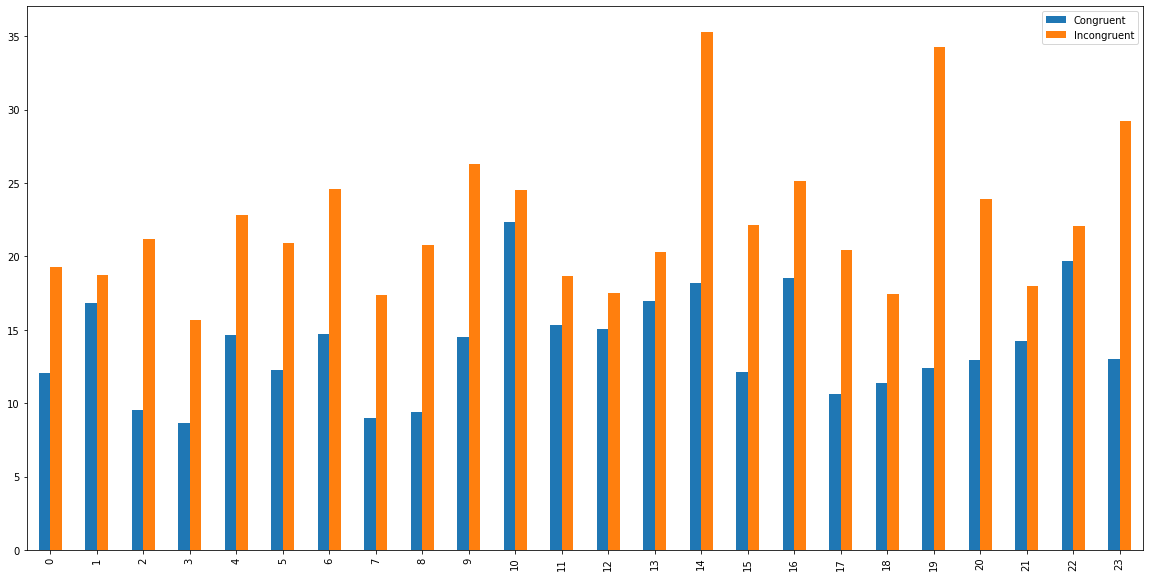

In [24]:
con1_mean=data['Congruent'].mean()
con1_std=data['Congruent'].std()
con2_mean=data['Incongruent'].mean()
con2_std=data['Incongruent'].std()

fg=plt.figure(figsize=(20,10))
ax=fg.add_subplot(1,1,1)
data.plot(kind='bar',ax=ax)
plt.show()

In [25]:
print('描述统计分析结果：')
print('第一组数据：字体内容和字体颜色一致情况下，实验者的平均反应时间是：',con1_mean,'秒，标准差是',con1_std,'秒')
print('第二组数据：字体内容和字体颜色不一致情况下，实验者的平均反应时间是：',con2_mean,'秒，标准差是',con2_std,'秒')
print('“不一致”情况下所用时间大于“一致”情况，也就是当字体内容和字体颜色不一致时，实验者的平均反应时间变长')


描述统计分析结果：
第一组数据：字体内容和字体颜色一致情况下，实验者的平均反应时间是： 13.926875000000003 秒，标准差是 3.5402194271529703 秒
第二组数据：字体内容和字体颜色不一致情况下，实验者的平均反应时间是： 22.35075 秒，标准差是 5.010217727196399 秒
“不一致”情况下所用时间大于“一致”情况，也就是当字体内容和字体颜色不一致时，实验者的平均反应时间变长


推论统计分析

进行假设检验
自变量：实验数据的颜色与文字含义
因变量：自变量的变化导致的反应时间变化

假设第一组的均值为u1，第二组的均值为u2
零假设H0：人们的反应时间不会因为字体内容和颜色是否一致而发生改变
备选假设：特鲁普效应确实存在，人们的反应时间会因为字体内容和颜色不一致而延长

因为该使用两组数据是相关样本，所以选择相关配对检验。
相关配对检验只关注每对相关数据的差值，从而避免得到的结论受到参与人员间正常反应时间独立性的影响。
在只关注差值集的情况下，样本集处理后只有一组（差值集）。下面我们对样本数据进行处理，从而得到差值集。


In [26]:
data['差值']=data['Congruent']-data['Incongruent']
data.head()

,Congruent,Incongruent,差值
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/pyth

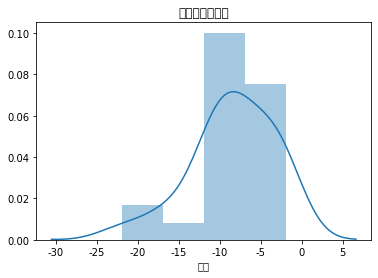

In [27]:
#抽样分布类型
import seaborn as sns
sns.distplot(data['差值'])
plt.title('差值数据集分布')
plt.show()

In [30]:
#数据集近似正态分布，可用t分布
#使用左尾检验，显著水平为5%，t检验的自由度df=n-1=25
#在零假设成立的前提下，得到样本平均值的概率p是多少？

from scipy import stats
t,p_two=stats.ttest_rel(data['Congruent'],data['Incongruent'])
print('t值=',t,'双尾检验的p值=',p_two)

p_one=p_two/2
print('单尾检验的p值=',p_one)

alpha=0.05

if (t<0 and p_one<alpha):
    print('拒绝零假设，有统计显著')
    print('也就是接受备选假设：特鲁普效应存在')
else:
    print('接受备选假设，没有统计显著，也就是特鲁普效应不存在')

t值= -8.088610872807587 双尾检验的p值= 3.548719149724915e-08
单尾检验的p值= 1.7743595748624577e-08
拒绝零假设，有统计显著
也就是接受备选假设：特鲁普效应存在


In [31]:
t_ci=2.262
sample_mean=data['差值'].mean()
se=stats.sem(data['差值'])
a=sample_mean-t_ci*se
b=sample_mean+t_ci*se
print('两个平均值差值的置信区间,95置信水平CI=[%f,%f]'%(a,b))

#差值数据集对应的总体平均值是0
pop_mean=0
sample_std=data['差值'].std()
d=(sample_mean-pop_mean)/sample_std
print('d=',d)
d= -1.696530924576647


两个平均值差值的置信区间,95置信水平CI=[-10.779632,-6.068118]
d= -1.6510807805255563


数据分析报告总结
1、描述统计分析
第一组样本数据：字体内容和字体颜色一致情况下，平均反应时间是：14.25秒，标准差是3.83秒
第二组样本数据：字体内容和字体颜色不一致情况下，平均反应时间是：22.75秒，标准差是5.29秒
“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体颜色不一致时，实验者的所花平均时间更长
2、推论统计分析
1）假设检验
相关配对检验t(25)=-8.48,p=1.102e-08(α=5%),左尾检验
统计上存在显著差异，拒绝零假设，从而验证斯特鲁普效应存在
2）置信区间
两个平均值差值的置信区间，95%的置信水平CI=[-10.76,-6.23]
3)效应量
d=-1.70